In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
df = pd.read_csv('tg_users_groups_actions_202412082008.csv')
df

,id,chat_id,action,action_from,action_to,reply_on_id,reply_on_chat_id,message_id,message_chat_id,time,created_at
0,61921,-1001255686586,message,490909755,NaN,NaN,NaN,1078,-1001255686586,2020-09-05 15:55:14.000 +0300,2024-12-02 23:54:43.617
1,61917,-1001255686586,message,447463387,NaN,NaN,NaN,1083,-1001255686586,2020-09-05 19:05:16.000 +0300,2024-12-02 23:54:43.186
2,61918,-1001255686586,message,447463387,NaN,NaN,NaN,1082,-1001255686586,2020-09-05 19:05:16.000 +0300,2024-12-02 23:54:43.395
3,61916,-1001255686586,message,520649308,NaN,NaN,NaN,1084,-1001255686586,2020-09-05 19:08:15.000 +0300,2024-12-02 23:54:43.005
4,61915,-1001255686586,message,369448325,NaN,NaN,NaN,1085,-1001255686586,2020-09-05 20:10:56.000 +0300,2024-12-02 23:54:42.861
...,...,...,...,...,...,...,...,...,...,...,...
118760,143750,-1001422302072,message,281655591,NaN,NaN,NaN,151807,-1001422302072,2024-12-08 16:20:43.000 +0300,2024-12-08 13:24:58.372
118761,143749,-1001422302072,message,1068019187,NaN,NaN,NaN,151809,-1001422302072,2024-12-08 16:23:35.000 +0300,2024-12-08 13:24:57.344
118762,143748,-1001422302072,message,281655591,NaN,NaN,NaN,151810,-1001422302072,2024-12-08 16:23:35.000 +0300,2024-12-08 13:24:56.420
118763,143747,-1001422302072,message,1068019187,NaN,NaN,NaN,151811,-1001422302072,2024-12-08 16:24:22.000 +0300,2024-12-08 13:24:55.528


In [4]:
df_groups = pd.read_csv('tg_groups_stats_last_202412081805.csv')
df_groups

,chat_id,chat_name,users_count,created_at
0,1,hggg,4,2024-11-25 15:14:19.096
1,-1002313549011,this_chat_love,3,2024-11-25 15:33:44.999
2,-1002023700211,Lolilendss,7191,2024-11-25 15:46:59.823
3,-1002462279841,new_love_chat,4,2024-11-25 18:59:10.860
4,-1001122783212,fpmi_abitu,2712,2024-11-25 19:09:35.721
...,...,...,...,...
67,-1001195309745,druzyabd,45358,2024-12-03 13:52:12.475
68,-1001549352738,chat_devushkim,32125,2024-12-03 16:21:11.439
69,-1001592476217,virtiklove,38377,2024-12-03 16:25:59.754
70,-1001679429088,vpiska_chatik,36904,2024-12-03 17:32:21.041


In [5]:
df_users = pd.read_csv('tg_users_last_202412081804.csv')
df_users

,tg_id,user_name,first_name,last_name,last_online,created_at
0,949454025,@Rollersman,Ivan,Vinogradov,2023-10-25 15:30:00.000 +0300,2024-12-02 19:03:17.308
1,437243863,@dmkhvatov,Дмитрий Хватов,NaN,2023-10-25 15:30:00.000 +0300,2024-12-02 19:03:17.420
2,277202123,@JustCookies,Лобанов,NaN,2023-10-25 15:30:00.000 +0300,2024-12-02 19:03:17.468
3,11,@new_user5,Иван,Иванов,2023-10-25 15:30:00.000 +0300,2024-11-25 15:14:19.144
4,7410432285,@avgust_buddy,Август,NaN,2024-11-25 18:19:28.000 +0300,2024-11-25 15:20:06.759
...,...,...,...,...,...,...
10164,6407616608,vvv843,Vvv,NaN,2023-10-25 15:30:00.000 +0300,2024-12-08 13:31:09.192
10165,907794408,rokuud,Влада,NaN,2023-10-25 15:30:00.000 +0300,2024-12-08 13:31:12.994
10166,567065522,YudinaJenya,Евгения,Юдина 🤍,2023-10-25 15:30:00.000 +0300,2024-12-08 13:31:14.280
10167,471923927,drsv212121,Svetochkа🖤,NaN,2023-10-25 15:30:00.000 +0300,2024-12-08 13:31:23.939


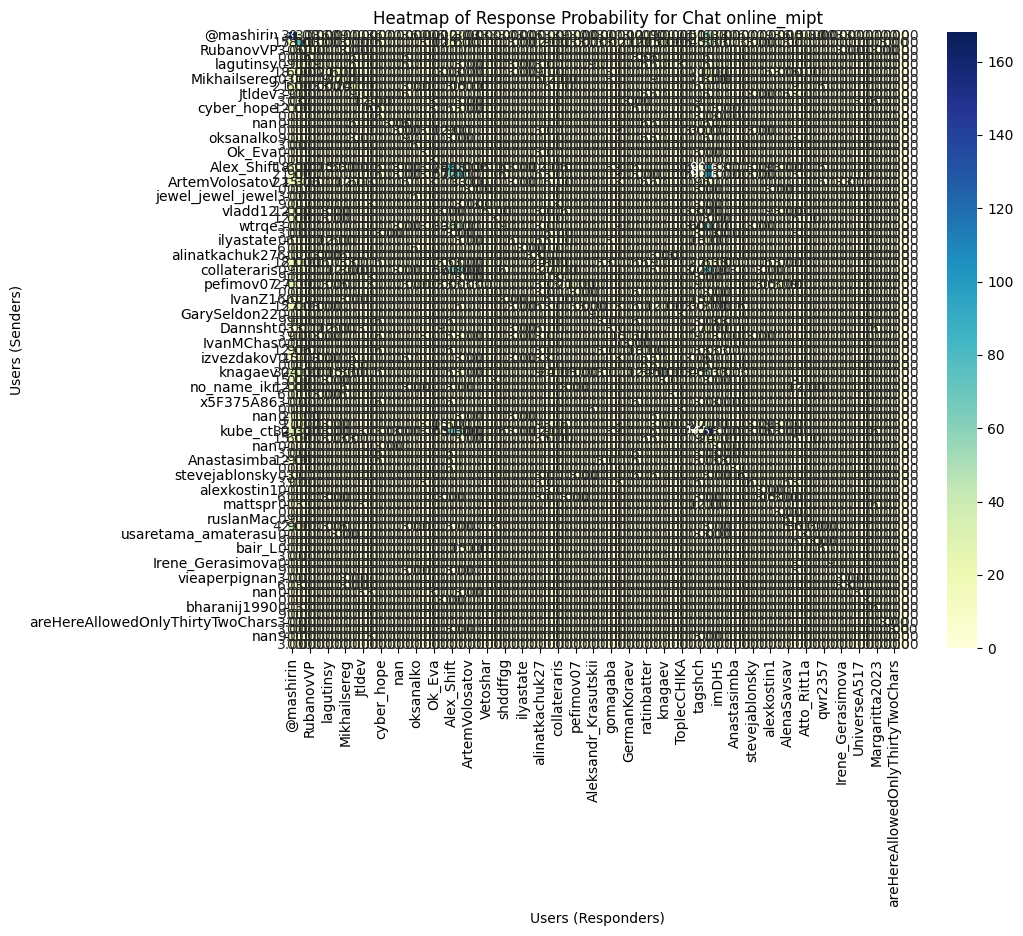

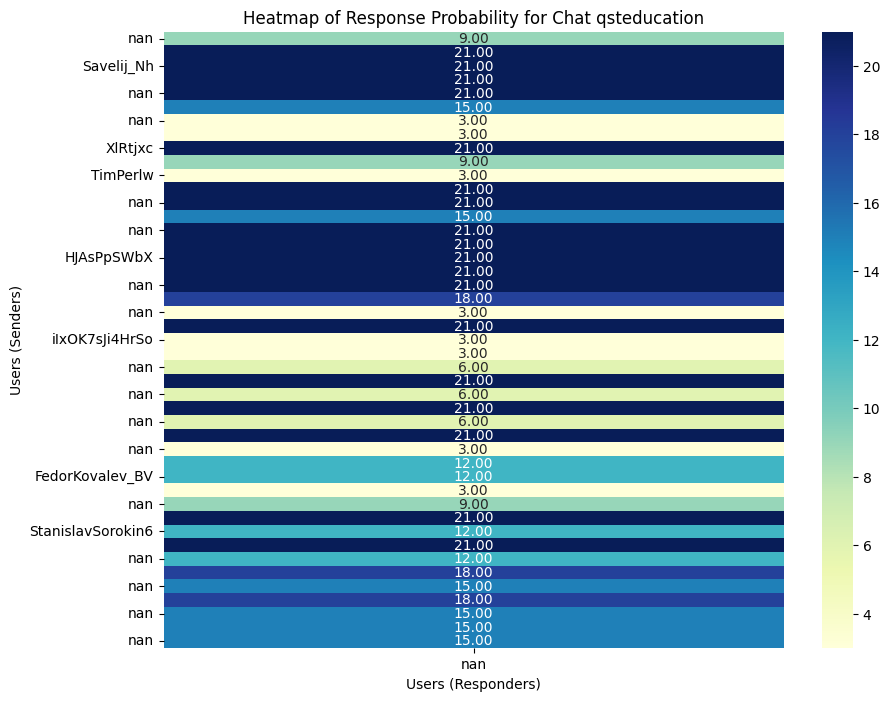

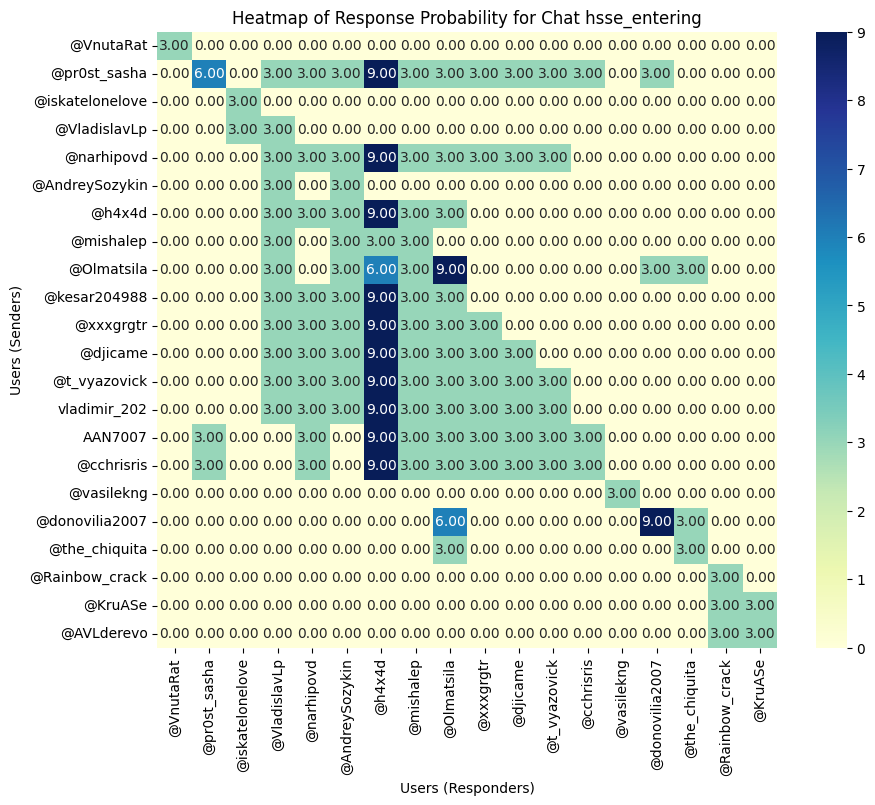

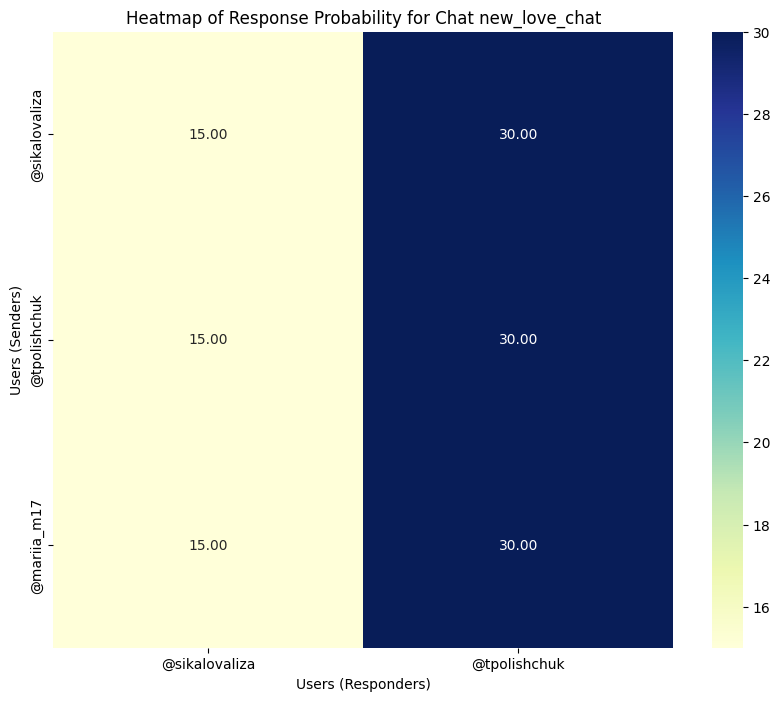

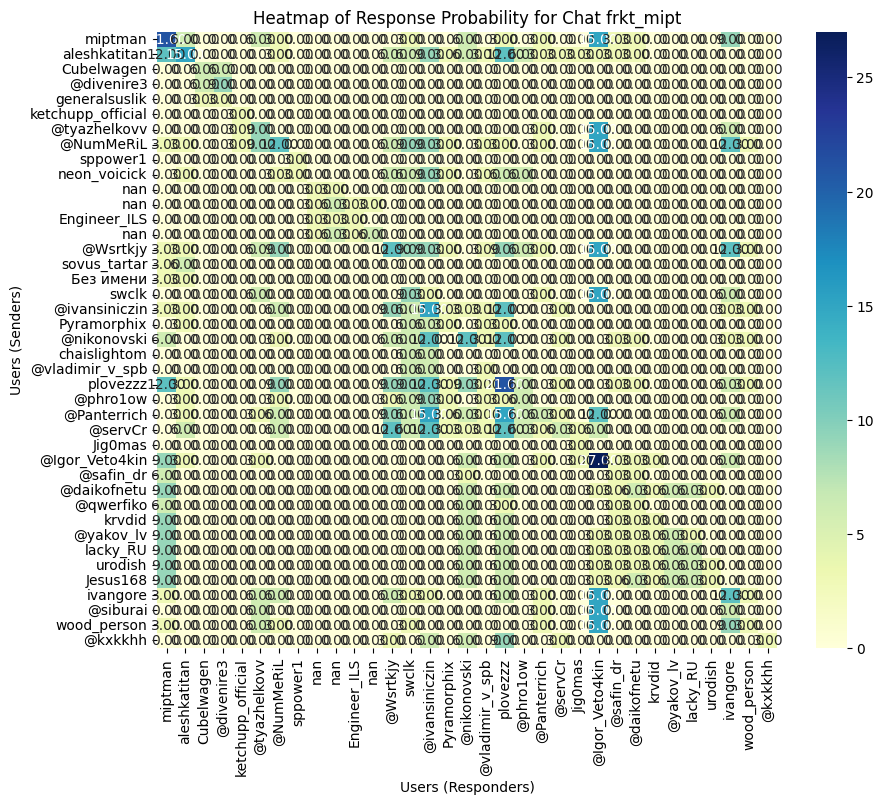

KeyboardInterrupt: 

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

action_weights = {
    'forward': 1,
    'add': 2,
    'reply': 3,
    'tag': 4,
    'delete': -100
}

df['time'] = pd.to_datetime(df['time'])

time_window = pd.Timedelta('5 hours')

chat_id_to_name = {row['chat_id']: row['chat_name'] for index, row in df_groups[['chat_id', 'chat_name']].drop_duplicates().iterrows()}

user_id_to_username = {row['tg_id']: row['user_name'] for index, row in df_users[['tg_id', 'user_name']].drop_duplicates().iterrows()}

for chat in df['chat_id'].unique():
    chat_messages = df[df['chat_id'] == chat]
    unique_users = df['action_from'].unique()
    probabilities_matrix = pd.DataFrame(0, index=unique_users, columns=unique_users)

    for user in unique_users:
        user_messages = chat_messages[chat_messages['action_from'] == user]
        for index, row in user_messages.iterrows():
            message_time = row['time']
            action_type = row['action']
            weight = action_weights.get(action_type, 0)

            replies_within_window = chat_messages[(chat_messages['time'] >= message_time) &
                                                  (chat_messages['time'] <= message_time + time_window)]
            if not replies_within_window.empty:
                for responder in replies_within_window['action_from'].unique():
                    probabilities_matrix.loc[responder, user] += weight

    row_sums = probabilities_matrix.sum(axis=1)

    probabilities_matrix = probabilities_matrix.loc[(row_sums > 0), (probabilities_matrix.sum(axis=0) > 0)]

    if probabilities_matrix.empty:
        continue

    # Убрали нормализацию
    # probabilities_matrix = probabilities_matrix.div(probabilities_matrix.values.diagonal(), axis=1)

    probabilities_matrix.index = probabilities_matrix.index.map(user_id_to_username)
    probabilities_matrix.columns = probabilities_matrix.columns.map(user_id_to_username)

    plt.figure(figsize=(10, 8))
    plt.title(f'Heatmap of Response Probability for Chat {chat_id_to_name.get(chat, chat)}')
    sns.heatmap(probabilities_matrix, annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)
    plt.xlabel('Users (Responders)')
    plt.ylabel('Users (Senders)')
    plt.show()
